<a href="https://colab.research.google.com/github/pranitha2144/Internship-iith/blob/Resnet/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Model
from keras.layers import Dense,Dropout
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [2]:
trdata = ImageDataGenerator(zoom_range=0.2,horizontal_flip=True)
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/data-liverd/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/data-liverd/val", target_size=(224,224))

Found 800 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [3]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet',include_top=True)

In [4]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
for layers in (vggmodel.layers)[:-8]:
    print(layers)
    layers.trainable = False

In [6]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
from tensorflow.keras import regularizers
X= vggmodel.layers[-2].output
fc_1=Dense(4096,activation='relu')(X)
dr_1=Dropout(0.2)(fc_1)
fc_2=Dense(4096, activation='relu')(dr_1)
dr_2=Dropout(0.2)(fc_2)
fc_3=Dense(4096,activation='relu')(dr_2)
predictions = Dense(4, activation="softmax")(fc_3)
model_final = Model(input = vggmodel.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [8]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [9]:
model_final.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])

In [10]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/My Drive/Best models/model_m_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
hist=model_final.fit_generator(traindata, steps_per_epoch=10,epochs= 10, validation_data= testdata,validation_steps=5, callbacks=[checkpoint,early])

Epoch 1/10
10/10 [==============================] - 316s 32s/step - loss: 1.0985 - accuracy: 0.5125 - val_loss: 1.0109 - val_accuracy: 0.5938

Epoch 00001: val_accuracy improved from -inf to 0.59375, saving model to /content/drive/My Drive/Best models/model_m_1.h5


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/10
10/10 [==============================] - 301s 30s/step - loss: 0.8396 - accuracy: 0.7094 - val_loss: 0.4608 - val_accuracy: 0.8015

Epoch 00002: val_accuracy improved from 0.59375 to 0.80147, saving model to /content/drive/My Drive/Best models/model_m_1.h5
Epoch 3/10
10/10 [==============================] - 302s 30s/step - loss: 0.5660 - accuracy: 0.7625 - val_loss: 1.0567 - val_accuracy: 0.5956

Epoch 00003: val_accuracy did not improve from 0.80147
Epoch 4/10
10/10 [==============================] - 306s 31s/step - loss: 0.5609 - accuracy: 0.7656 - val_loss: 0.6386 - val_accuracy: 0.6812

Epoch 00004: val_accuracy did not improve from 0.80147
Epoch 5/10
10/10 [==============================] - 295s 29s/step - loss: 0.4400 - accuracy: 0.8313 - val_loss: 0.8547 - val_accuracy: 0.6912

Epoch 00005: val_accuracy did not improve from 0.80147
Epoch 6/10
10/10 [==============================] - 294s 29s/step - loss: 0.4591 - accuracy: 0.8313 - val_loss: 0.7124 - val_accuracy: 0.7

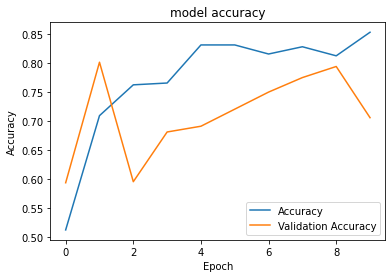

In [12]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

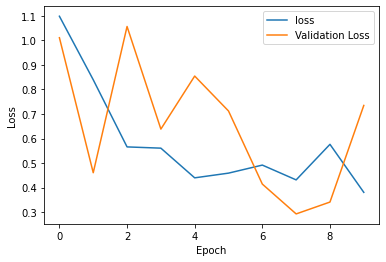

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [ ]:
model_final.save("/content/drive/My Drive/Best models/model1_1.h5")

In [14]:
model_cnn=keras.models.load_model("/content/drive/My Drive/Best models/model_m_1.h5")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

test_datagen = ImageDataGenerator()

In [ ]:
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/data_liver/test',
                                                        target_size=(224, 224))

In [ ]:
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model_cnn.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
#target_names = ['grade1', 'grade0', 'grade2','grade3']
print(classification_report(validation_generator.classes, y_pred))

In [15]:
import os
import numpy as np
actual=[]
predicted=[]
data_path='/content/drive/My Drive/data-liverd/val'
data_dir_list=os.listdir(data_path)
for dataset in data_dir_list:
  print(dataset)
  img_list=os.listdir(data_path+'/'+dataset)
  correctCount=0
  wrongCount=0
  for img in img_list:
    img_path=data_path+'/'+dataset+'/'+img
    input_image = image.load_img(img_path,target_size=(224,224))
    input_image = np.asarray(input_image)
    input_image = np.expand_dims(input_image, axis=0)
    output = model_cnn.predict(input_image)
    ans='grade'+str(np.argmax(output[0],axis=0))
    if( ans in img):
      correctCount+=1
    else:
      wrongCount+=1
    actual.append(img[:6])
    predicted.append(ans)
  print("correct Count {} WrongCount {}".format(correctCount,wrongCount))

grade1
correct Count 19 WrongCount 31
grade0
correct Count 48 WrongCount 2
grade2
correct Count 48 WrongCount 2
grade3
correct Count 44 WrongCount 6


In [16]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(actual, predicted) 

print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted)) 


Confusion Matrix :
[[48  2  0  0]
 [ 6 19  4 21]
 [ 1  1 48  0]
 [ 0  5  1 44]]
Accuracy Score : 0.795
Report : 
              precision    recall  f1-score   support

      grade0       0.87      0.96      0.91        50
      grade1       0.70      0.38      0.49        50
      grade2       0.91      0.96      0.93        50
      grade3       0.68      0.88      0.77        50

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.80      0.78       200



In [17]:
import os
import numpy as np
actual=[]
predicted=[]
data_path='/content/drive/My Drive/data-liverd/val'
data_dir_list=os.listdir(data_path)
for dataset in data_dir_list:
  print(dataset)
  img_list=os.listdir(data_path+'/'+dataset)
  correctCount=0
  wrongCount=0
  for img in img_list:
    img_path=data_path+'/'+dataset+'/'+img
    input_image = image.load_img(img_path,target_size=(224,224))
    input_image = np.asarray(input_image)
    input_image = np.expand_dims(input_image, axis=0)
    output = model_final.predict(input_image)
    ans='grade'+str(np.argmax(output[0],axis=0))
    if( ans in img):
      correctCount+=1
    else:
      wrongCount+=1
    actual.append(img[:6])
    predicted.append(ans)
  print("correct Count {} WrongCount {}".format(correctCount,wrongCount))

grade1
correct Count 26 WrongCount 24
grade0
correct Count 46 WrongCount 4
grade2
correct Count 49 WrongCount 1
grade3
correct Count 24 WrongCount 26


In [18]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(actual, predicted) 

print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted)) 


Confusion Matrix :
[[46  4  0  0]
 [ 2 26 16  6]
 [ 1  0 49  0]
 [ 0 10 16 24]]
Accuracy Score : 0.725
Report : 
              precision    recall  f1-score   support

      grade0       0.94      0.92      0.93        50
      grade1       0.65      0.52      0.58        50
      grade2       0.60      0.98      0.75        50
      grade3       0.80      0.48      0.60        50

    accuracy                           0.73       200
   macro avg       0.75      0.72      0.71       200
weighted avg       0.75      0.72      0.71       200



In [ ]:
tr_loss,tr_acc=model_final.evaluate(validation_generator)
tr_acc

In [ ]:
tr_loss,tr_acc=model_final.evaluate(traindata)
tr_acc

In [ ]:
tr_loss,tr_acc=model_cnn.evaluate(testdata)
tr_acc

In [ ]:
saved_model=keras.models.load_model("/content/drive/My Drive/Best models/model_b_1.h5")

In [ ]:
tr_loss,tr_acc=saved_model.evaluate(validation_generator)
tr_acc

In [ ]:
tr_loss,tr_acc=saved_model.evaluate(testdata)
tr_acc

In [ ]:
model_final=keras.models.load_model("/content/drive/My Drive/Best models/model_f_1.h5")